In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


import functions as main

import warnings
warnings.filterwarnings('ignore')

# Load Full Clean Df

In [2]:
opencsv = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\full_clean_df.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.astype(float)

In [3]:
opencsv.tail()

,JPY_EUR,BTC_PageViews,Crypto_PageViews,BTC_Supply,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,...,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-12,0.005814,4441.0,29.0,1.972469e+07,0.070356,-2.778050e-02,-3.639985,0.0,0.070527,0.079788,...,-0.011280,0.084151,0.132287,0.049644,0.079029,-0.057909,0.068868,0.088750,1.145594,-0.089711
2024-07-19,0.005837,4161.0,27.0,1.972799e+07,0.488202,1.207437e-01,0.437076,0.0,0.025569,0.025217,...,-0.164819,-0.160448,-0.092174,-0.097313,-0.050027,-0.230030,-0.050902,-0.039784,-1.026794,0.088710
2024-07-26,0.005995,4953.0,48.0,1.973157e+07,0.067538,-3.108624e-15,-0.448385,0.0,-0.044631,0.085278,...,-0.103285,0.035904,-0.110098,-0.030873,-0.039876,-0.194641,0.003493,0.033664,-0.333627,0.068678
2024-08-02,0.006054,4674.0,27.0,1.973481e+07,-0.360976,4.076981e-01,0.928560,0.0,-0.031257,0.026108,...,0.068183,0.056101,0.221902,0.081259,0.214609,0.146383,0.090826,0.088750,-0.334180,0.007264
2024-08-09,0.006054,5059.0,28.0,1.973761e+07,-0.108526,0.000000e+00,-1.228138,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.527586,0.037224


In [4]:
full_sample = opencsv.loc["2010-9-10":"2024-07-26"]
full_sample

,JPY_EUR,BTC_PageViews,Crypto_PageViews,BTC_Supply,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,...,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,,,,
2010-09-24,0.008880,NaN,NaN,4.091750e+06,1.165714e-07,9.694689e-12,-1.168041e-06,-0.008558,0.215828,0.110011,...,0.012406,0.007912,0.045043,-0.010620,0.077941,0.115819,0.063193,0.027031,0.000956,0.000717
2010-10-01,0.008780,NaN,NaN,4.157600e+06,-1.276735e-08,1.896105e-11,3.943009e-07,-0.009960,0.268974,0.079394,...,-0.004829,-0.036393,0.000000,-0.020253,0.080478,0.102950,0.051803,0.034592,0.000567,0.000364
2010-10-08,0.008710,NaN,NaN,4.206900e+06,1.381094e-06,0.000000e+00,2.284634e-06,0.020903,0.271499,0.103109,...,0.005497,0.026899,0.090749,0.010867,0.099692,0.173729,-0.013517,0.047940,-0.001509,-0.000793
2010-10-15,0.008720,NaN,NaN,4.267300e+06,1.007510e-06,2.807865e-12,-1.447250e-06,0.005284,0.127880,0.080880,...,0.012926,0.025317,-0.009935,0.003705,0.073228,0.164077,-0.136911,-0.051067,-0.000239,-0.000186
2010-10-22,0.008840,NaN,NaN,4.349150e+06,2.220408e-07,3.647072e-11,-5.673744e-07,0.005401,-0.137688,0.015310,...,0.001114,0.016614,-0.003976,0.008892,-0.143193,-0.159251,0.038473,0.029185,0.001870,0.001313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,0.005808,3687.0,17.0,1.971838e+07,-2.106635e-01,0.000000e+00,9.457985e-01,-0.021441,0.001832,-0.041016,...,-0.002593,-0.033660,0.180935,0.021735,0.008338,-0.065953,-0.108446,-0.071696,0.007789,0.174027
2024-07-05,0.005730,4547.0,28.0,1.972142e+07,-2.041699e-01,-1.699513e-01,3.264935e+00,0.009820,0.075309,-0.021453,...,0.143522,0.060589,0.151064,0.007162,0.214609,0.307242,0.053447,0.087372,-0.706171,-0.188464
2024-07-12,0.005814,4441.0,29.0,1.972469e+07,7.035586e-02,-2.778050e-02,-3.639985e+00,0.000000,0.070527,0.079788,...,-0.011280,0.084151,0.132287,0.049644,0.079029,-0.057909,0.068868,0.088750,1.145594,-0.089711


In [5]:
full_sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 723 entries, 2010-09-24 to 2024-07-26
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   JPY_EUR             723 non-null    float64
 1   BTC_PageViews       474 non-null    float64
 2   Crypto_PageViews    474 non-null    float64
 3   BTC_Supply          723 non-null    float64
 4   BTC_USD             723 non-null    float64
 5   Mining_Difficulty   723 non-null    float64
 6   USD_OnChain_Volume  723 non-null    float64
 7   M2_Liquidity        723 non-null    float64
 8   EUR_USD             723 non-null    float64
 9   JPY_USD             723 non-null    float64
 10  SPY                 723 non-null    float64
 11  QQQ                 723 non-null    float64
 12  EXSA                723 non-null    float64
 13  JPXN                723 non-null    float64
 14  IWDA                723 non-null    float64
 15  GLD                 723 non-null    fl

In [6]:
full_sample = full_sample.drop(columns=["BTC_PageViews", "Crypto_PageViews"]) # removi porque nao tem a informacao completa para estes anos todos
full_sample

,JPY_EUR,BTC_Supply,BTC_USD,Mining_Difficulty,USD_OnChain_Volume,M2_Liquidity,EUR_USD,JPY_USD,SPY,QQQ,EXSA,JPXN,IWDA,GLD,SLV,TLT,BND,Nr_Transactions,Nr_Addresses
Date,,,,,,,,,,,,,,,,,,,
2010-09-24,0.008880,4.091750e+06,1.165714e-07,9.694689e-12,-1.168041e-06,-0.008558,0.215828,0.110011,0.014741,0.012406,0.007912,0.045043,-0.010620,0.077941,0.115819,0.063193,0.027031,0.000956,0.000717
2010-10-01,0.008780,4.157600e+06,-1.276735e-08,1.896105e-11,3.943009e-07,-0.009960,0.268974,0.079394,-0.001329,-0.004829,-0.036393,0.000000,-0.020253,0.080478,0.102950,0.051803,0.034592,0.000567,0.000364
2010-10-08,0.008710,4.206900e+06,1.381094e-06,0.000000e+00,2.284634e-06,0.020903,0.271499,0.103109,0.012210,0.005497,0.026899,0.090749,0.010867,0.099692,0.173729,-0.013517,0.047940,-0.001509,-0.000793
2010-10-15,0.008720,4.267300e+06,1.007510e-06,2.807865e-12,-1.447250e-06,0.005284,0.127880,0.080880,0.007339,0.012926,0.025317,-0.009935,0.003705,0.073228,0.164077,-0.136911,-0.051067,-0.000239,-0.000186
2010-10-22,0.008840,4.349150e+06,2.220408e-07,3.647072e-11,-5.673744e-07,0.005401,-0.137688,0.015310,0.004112,0.001114,0.016614,-0.003976,0.008892,-0.143193,-0.159251,0.038473,0.029185,0.001870,0.001313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28,0.005808,1.971838e+07,-2.106635e-01,0.000000e+00,9.457985e-01,-0.021441,0.001832,-0.041016,-0.002368,-0.002593,-0.033660,0.180935,0.021735,0.008338,-0.065953,-0.108446,-0.071696,0.007789,0.174027
2024-07-05,0.005730,1.972142e+07,-2.041699e-01,-1.699513e-01,3.264935e+00,0.009820,0.075309,-0.021453,0.085074,0.143522,0.060589,0.151064,0.007162,0.214609,0.307242,0.053447,0.087372,-0.706171,-0.188464
2024-07-12,0.005814,1.972469e+07,7.035586e-02,-2.778050e-02,-3.639985e+00,0.000000,0.070527,0.079788,0.043680,-0.011280,0.084151,0.132287,0.049644,0.079029,-0.057909,0.068868,0.088750,1.145594,-0.089711


In [7]:
full_sample.isna().sum()

JPY_EUR               0
BTC_Supply            0
BTC_USD               0
Mining_Difficulty     0
USD_OnChain_Volume    0
M2_Liquidity          0
EUR_USD               0
JPY_USD               0
SPY                   0
QQQ                   0
EXSA                  0
JPXN                  0
IWDA                  0
GLD                   0
SLV                   0
TLT                   0
BND                   0
Nr_Transactions       0
Nr_Addresses          0
dtype: int64

# Granger causality test 

In [8]:
from statsmodels.tsa.stattools import grangercausalitytests

# It is a statistical hypothesis test for determining whether one time series is useful in forecasting another

# lists to store variables
causality_true = []
causality_false = []

maxlag = 10
dependent_variable = "BTC_USD"

for column in full_sample.columns:
    if column != dependent_variable:  # Skip the target variable
        # Perform Granger Causality Test
        # The data for testing whether the time series in the second column Granger causes the time series in the first column. 
        result = grangercausalitytests(full_sample[[dependent_variable, column]], maxlag=maxlag, verbose=False)
        
        # Check if any lag has a p-value < 0.05
        min_p_value = min([result[lag][0]['ssr_chi2test'][1] for lag in range(1, maxlag+1)])

        if min_p_value < 0.05:
            causality_true.append(column)
        else:
            causality_false.append(column)

# Output the results
print(f"Variables that Granger-cause {dependent_variable}:", causality_true)
print(f"Variables that do NOT Granger-cause {dependent_variable}:", causality_false)

Variables that Granger-cause BTC_USD: ['SPY', 'EXSA', 'IWDA', 'BND', 'Nr_Transactions', 'Nr_Addresses']
Variables that do NOT Granger-cause BTC_USD: ['JPY_EUR', 'BTC_Supply', 'Mining_Difficulty', 'USD_OnChain_Volume', 'M2_Liquidity', 'EUR_USD', 'JPY_USD', 'QQQ', 'JPXN', 'GLD', 'SLV', 'TLT']


# PACF - BTC USD Price

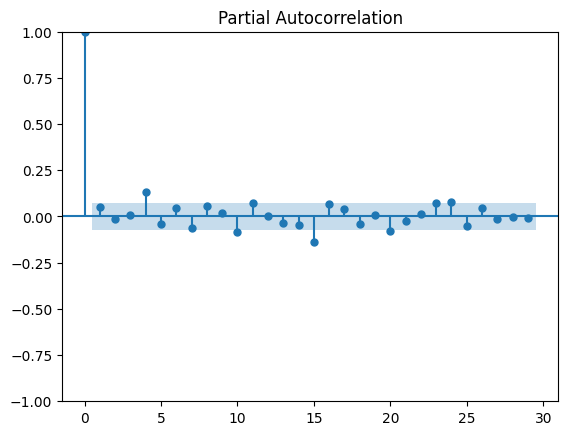

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(full_sample.BTC_USD)
plt.show()

**So consider an AR(4)**

# Model Dfs

In [10]:
full_sample.columns

Index(['JPY_EUR', 'BTC_Supply', 'BTC_USD', 'Mining_Difficulty',
       'USD_OnChain_Volume', 'M2_Liquidity', 'EUR_USD', 'JPY_USD', 'SPY',
       'QQQ', 'EXSA', 'JPXN', 'IWDA', 'GLD', 'SLV', 'TLT', 'BND',
       'Nr_Transactions', 'Nr_Addresses'],
      dtype='object')

In [11]:
'''
Distinguish between endogenous and exogenous variables based on their roles in the Bitcoin market:

Endogenous Variables: These are the primary variables of interest that the model aims to predict. 
They include the equilibrium closing price of Bitcoin (MKPRU), the number of unique MyWallet users (MWNUS), 
and the total Bitcoin available in the market (TOTBC)1.

Exogenous Variables: These are external factors that influence the endogenous variables. 
They include Miner’s Revenue (MIREV), Bitcoin Difficulty (DIFF), Number of Transactions per Block (NTRBL), 
Average Block Size (AVBLS), Change in the Number of Unique Addresses (NADDU), Total Output Volume (TRVOU), 
and Hash Rate (HRATE).

These distinctions help in understanding and forecasting Bitcoin’s market behavior.
'''

df_model = full_sample.copy()

# Example: Based on your output, you might start by removing BND, SPY, QQQ, JPXN, EXSA, and TLT, which all have high p-values.

endog = ['BTC_USD', 'Nr_Transactions', 'Nr_Addresses', 'BTC_Supply', 'Mining_Difficulty', 'USD_OnChain_Volume']
exog = ['IWDA', 'SPY', 'EXSA', 'BND']# , 'GLD', 'SLV' 'JPY_EUR', 'M2_Liquidity', 'EUR_USD',

split = int(0.9*(len(full_sample)))

df_train = df_model[:split]
df_test = df_model[split:]

# Split the data into endogenous and exogenous variables for the training set
df_endog_train = df_train[endog]
df_exog_train = df_train[exog]

# Split the data into endogenous and exogenous variables for the testing set
df_endog_test = df_test[endog]
df_exog_test = df_test[exog]

In [12]:
# Output the results
print(f"Variables that Granger-cause {dependent_variable}:", causality_true)
print(f"Variables that do NOT Granger-cause {dependent_variable}:", causality_false)

Variables that Granger-cause BTC_USD: ['SPY', 'EXSA', 'IWDA', 'BND', 'Nr_Transactions', 'Nr_Addresses']
Variables that do NOT Granger-cause BTC_USD: ['JPY_EUR', 'BTC_Supply', 'Mining_Difficulty', 'USD_OnChain_Volume', 'M2_Liquidity', 'EUR_USD', 'JPY_USD', 'QQQ', 'JPXN', 'GLD', 'SLV', 'TLT']


In [13]:
df_train.shape

(650, 19)

In [14]:
df_test.shape

(73, 19)

# Determine max number lags

We can test the performance of our model by using the following methods:

**Akaike information criterion (AIC)**: It quantifies the quality of a model by balancing the fit of the model to the data with the complexity of the model. AIC provides a way to compare different models and choose the one that best fits the data with the least complexity.

**Bayesian information criterion (BIC)**: This stats measure is used for model selection among a set of candidate models. Like the Akaike information criterion (AIC), BIC provides a trade-off between the goodness of fit and model complexity. However, BIC places a stronger penalty on the number of parameters than AIC does, which can help prevent overfitting.

In [15]:
from statsmodels.tsa.api import VAR

# Lower is better

model = VAR(endog = df_endog_train, exog = df_exog_train)
model.select_order(10).summary()

c:\Users\Rui Caseiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,7.561,7.771,1922.,7.643
1,-6.189,-5.729,0.002053,-6.010
2,-7.528,-6.817*,0.0005378,-7.252*
3,-7.533,-6.571,0.0005353,-7.160
4,-7.619,-6.406,0.0004911,-7.148
5,-7.666,-6.202,0.0004688,-7.098
6,-7.667,-5.952,0.0004684,-7.002
7,-7.722,-5.756,0.0004438,-6.959
8,-7.766*,-5.549,0.0004249*,-6.905
9,-7.721,-5.254,0.0004447,-6.763


# Fit a VAR Model

In [16]:
from statsmodels.tsa.api import VAR

# Escolhi 4 lags porque é o que tem o AIC mais baixo e o BIC mais baixo é o lag 1, então também inclui esse

model = VAR(endog = df_endog_train, exog = df_exog_train)
model_fit = model.fit(maxlags=8)
model_fit.summary()

c:\Users\Rui Caseiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 23, Aug, 2024
Time:                     10:50:35
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -5.51124
Nobs:                     642.000    HQIC:                  -6.86443
Log likelihood:          -2668.77    FPE:                0.000443677
AIC:                     -7.72267    Det(Omega_mle):     0.000275657
--------------------------------------------------------------------
Results for equation BTC_USD
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                        -0.016526         0.070595           -0.234           0.815
IWDA                          0.206753         0.205773            1.005           0.315
SPY                       

prob = p-value

In [17]:
df_coeff=pd.DataFrame([model_fit.params["BTC_USD"], model_fit.pvalues["BTC_USD"]]).T
df_coeff.columns = ["coeff", "pval"]
df_coeff = df_coeff.query("pval < 0.05")
df_coeff

,coeff,pval
SPY,0.312784,0.026876
L1.Nr_Addresses,-0.111150,0.023905
L1.USD_OnChain_Volume,0.041927,0.010196
L3.Nr_Transactions,-0.113930,0.029459
L3.Nr_Addresses,0.149391,0.006210
L4.BTC_USD,0.089377,0.044387
L6.Mining_Difficulty,-0.543887,0.000234
L8.BTC_USD,0.141003,0.001620
L8.Nr_Transactions,0.088107,0.046875
L8.Mining_Difficulty,-0.332368,0.026373


# So our final model is:

Só considera prob / p-value < 0.05


BTC_USD = 0.35L1.SPY - 0.12L2.USD_OnChain_Volume + 0.14L2.SLV


### test different lags

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Step 1: Make predictions on the test set
# We start predicting after the last lag in the training set

# Initialize an empty DataFrame to store results for each lag
results_df = pd.DataFrame(columns=["Lag", "MAE", "RMSE", "MAPE"])

# Iterate over different lag values
for lag in range(1, 12):  # Start at 1 to avoid using a zero-lag, which doesn't make sense
    # Re-fit the model for the current lag
    model = VAR(endog = df_endog_train, exog = df_exog_train)
    model_fit = model.fit(maxlags=lag)
    
    # Make predictions on the test set
    n_forecast = len(df_test)
    forecast = model_fit.forecast(y=df_endog_train.values[-lag:], steps=n_forecast, exog_future=df_exog_test.values)

    # Convert the forecast to a DataFrame with the same column names as df_train
    forecast_df = pd.DataFrame(forecast, index=df_endog_test.index, columns=df_endog_test.columns)

    # Calculate MAE, RMSE, and MAPE for the specific column ('BTC_USD')
    mae = mean_absolute_error(df_test.BTC_USD, forecast_df.BTC_USD)
    rmse = np.sqrt(mean_squared_error(df_test.BTC_USD, forecast_df.BTC_USD))
    mape = mean_absolute_percentage_error(df_test.BTC_USD, forecast_df.BTC_USD)

    # Save the results into the DataFrame using pd.concat
    result_row = pd.DataFrame({"Lag": [lag], "MAE": [mae], "RMSE": [rmse], "MAPE": [mape]})
    results_df = pd.concat([results_df, result_row], ignore_index=True)
    
# Set the 'Lag' column as the index
results_df.set_index("Lag", inplace=True)

# Display the results DataFrame
print(results_df)

          MAE      RMSE      MAPE
Lag                              
1    0.118818  0.171921  4.101868
2    0.119214  0.171563  4.120623
3    0.119384  0.171863  4.436823
4    0.119026  0.171154  4.798432
5    0.118736  0.170996  4.393230
6    0.120905  0.173844  5.320725
7    0.120876  0.173573  5.130146
8    0.122786  0.174957  7.534381
9    0.122377  0.174904  8.007371
10   0.123619  0.175387  7.925740
11   0.125143  0.176128  7.411777


c:\Users\Rui Caseiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\Rui Caseiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\Rui Caseiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\Rui Caseiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

c:\Users\Rui Caseiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No freq

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [30]:
# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fit.resid)

for col, val in zip(df_endog_train.columns, out):
    print(col, ':', round(val, 2))

#   The value of this statistic can vary between 0 and 4. The closer it is to the value 2, 
#   then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, 
#   and the closer it is to 4 implies negative serial correlation.

BTC_USD : 1.97
Nr_Transactions : 1.98
Nr_Addresses : 1.99
BTC_Supply : 2.03
Mining_Difficulty : 1.96
USD_OnChain_Volume : 1.93


# Validate model - MAE, RMSE and MAPE

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Make predictions on the test set
n_forecast = len(df_endog_test)
forecast = model_fit.forecast(y=df_endog_train.values[-lag:], steps=n_forecast, exog_future=df_exog_test.values)

# Convert the forecast to a DataFrame with the same column names as df_train
forecast_df = pd.DataFrame(forecast, index=df_endog_test.index, columns=df_endog_test.columns)
yhat = forecast_df.BTC_USD

'''
# Calculate MAE, RMSE, and MAPE for the specific column ('BTC_USD')
mae = mean_absolute_error(df_endog_test.BTC_USD, forecast_df.BTC_USD)
rmse = np.sqrt(mean_squared_error(df_endog_test.BTC_USD, forecast_df.BTC_USD))
mape = mean_absolute_percentage_error(df_endog_test.BTC_USD, forecast_df.BTC_USD)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
'''

'\n# Calculate MAE, RMSE, and MAPE for the specific column (\'BTC_USD\')\nmae = mean_absolute_error(df_endog_test.BTC_USD, forecast_df.BTC_USD)\nrmse = np.sqrt(mean_squared_error(df_endog_test.BTC_USD, forecast_df.BTC_USD))\nmape = mean_absolute_percentage_error(df_endog_test.BTC_USD, forecast_df.BTC_USD)\n\n# Print the results\nprint("Mean Absolute Error (MAE):", mae)\nprint("Root Mean Squared Error (RMSE):", rmse)\nprint("Mean Absolute Percentage Error (MAPE):", mape)\n'

In [20]:
def forecast_accuracy(forecast, actual):
    forecast = forecast.values
    actual = actual.values
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))    # MAPE Mean Absolute Percentage Error
    me = np.mean(forecast - actual)                             # ME Mean Error
    mae = np.mean(np.abs(forecast - actual))    # MAE Mean Absolute Error 
    mpe = np.mean((forecast - actual)/actual)   # MPE Mean Percentage Error
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE Root Mean Squared Error
    corr = np.corrcoef(forecast, actual)[0,1]   # corr Correlation
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

**MAPE (Mean absolute percentage error)** It considers actual values fed into model and fitted values from the model and calculates absolute difference between the two as a percentage of actual value and finally calculates mean of that.

In [21]:
forecast_accuracy(yhat, df_endog_test.BTC_USD)

{'mape': 7.411776732524279,
 'me': -0.027847825222289898,
 'mae': 0.12514298709925836,
 'mpe': 3.7345671541798153,
 'rmse': 0.1761281708172258,
 'corr': -0.10468990261212369,
 'minmax': 3.533944868640347}

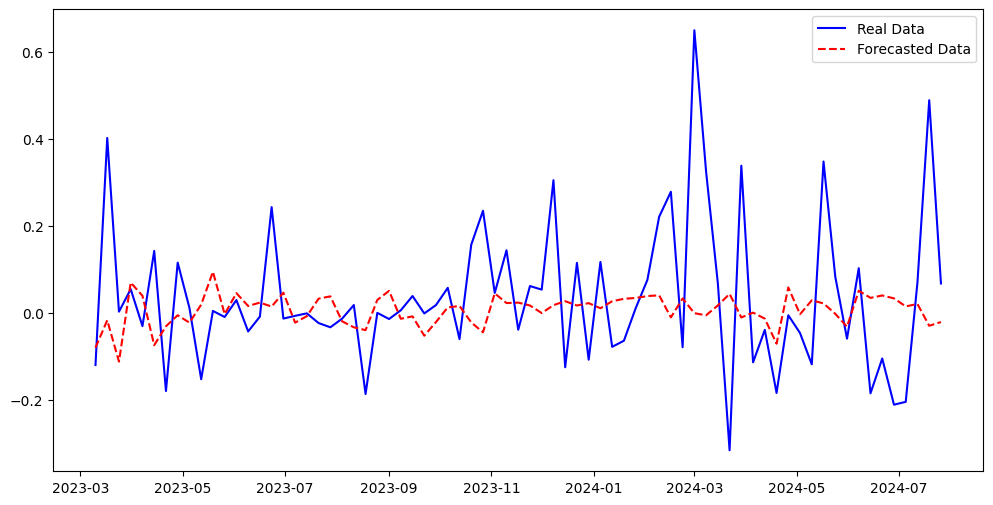

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df_endog_test.BTC_USD, color='blue', label='Real Data')
plt.plot(yhat, color='red', linestyle='dashed', label='Forecasted Data')
plt.legend()

## Undo Data Transformations

In [23]:
opencsv_btc = pd.read_csv(r"D:\OneDrive - Instituto Politecnico de Castelo Branco\002_Learning\001_Pos_Graduacao\Ciclo 5 - Projeto Final\ProjetoFinal-PosGraduacaoEngenhariaFinanceira\df_weekly.csv", sep=",")
opencsv_btc = opencsv_btc[["Date", "BTC_USD"]]
opencsv_btc.set_index('Date', inplace=True)
opencsv_btc.index = pd.to_datetime(opencsv_btc.index)
opencsv_btc = opencsv_btc.astype(float)

In [24]:
# Assuming these are available from your original data processing steps

ts = opencsv_btc.BTC_USD
ts = ts.loc["2023-3-10":"2024-07-26"]

mu = ts.mean()
sigma = ts.std()

normalized_ts = (ts - mu) / sigma

differenced_ts = normalized_ts.diff()

def revert_transformations(transformed_ts, original_ts):
    # Get the mean and standard deviation of the original series
    mu = original_ts.mean()
    sigma = original_ts.std()
    
    # Step 1: Undo the differencing
    undifferenced = transformed_ts.cumsum()
    
    # Add back the first value of the normalized series
    normalized_start = (original_ts.iloc[0] - mu) / sigma
    undifferenced = normalized_start + undifferenced
    
    # Step 2: Undo the normalization
    reverted = (undifferenced * sigma) + mu
    
    # Ensure the index matches the original series
    return reverted.reindex(original_ts.index)

In [25]:
# Usage example:
reverted_ts = revert_transformations(differenced_ts, ts)

compare_df = pd.DataFrame()

compare_df["x_axis"] = ts
compare_df["y_axis"] = reverted_ts
compare_df = compare_df.dropna()

main.dispersion_map(compare_df,compare_df["x_axis"], compare_df["y_axis"])

# a destransformaçao funciona impecavel

In [26]:
# Un Transform forecast data

reverted_yhat = revert_transformations(yhat, ts)
reverted_yhat

Date
2023-03-10    18901.568650
2023-03-17    18625.674267
2023-03-24    16796.965583
2023-03-31    17936.483173
2023-04-07    18578.875484
                  ...     
2024-06-28    28571.777082
2024-07-05    28816.035427
2024-07-12    29150.703372
2024-07-19    28667.687886
2024-07-26    28324.900917
Name: BTC_USD, Length: 73, dtype: float64

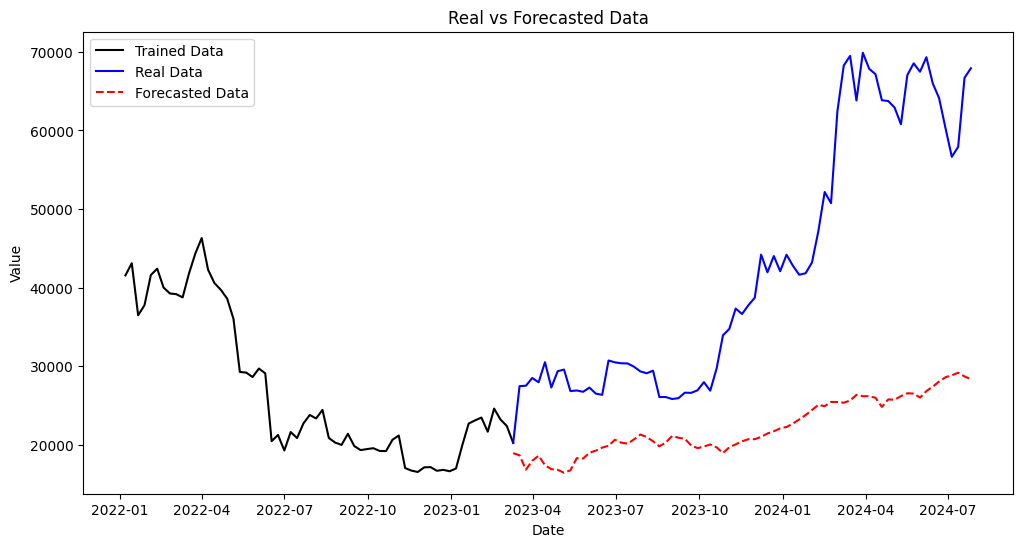

In [27]:
# Plot the real data
plt.figure(figsize=(12, 6))

# Slice the DataFrame from the start of 2023
opencsv_btc_2023 = opencsv_btc.loc["2022-01-01":"2023-3-10"]
plt.plot(opencsv_btc_2023.index, opencsv_btc_2023, color='black', label='Trained Data')

plt.plot(ts.index, ts, color='blue', label='Real Data')

# Plot the forecasted data
plt.plot(reverted_yhat.index, reverted_yhat, color='red', linestyle='dashed', label='Forecasted Data')

# Add title and labels
plt.title('Real vs Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Value')

# Add a legend
plt.legend()

# Show the plot
plt.show()